# Dimensionality Reduction

Use the dataset following the steps from [here](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python), but using the example with the picture of the 4.

The actual lab and instructions are [here](https://github.com/jordanott/CPSC392/blob/master/Labs/DimensionalityReduction.ipynb).

For the explained variance ratio use the example [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Use a for loop to iterate through the components until you get a variance above 0.95

---

In [2]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

f = gzip.open('train-images-idx3-ubyte.gz', 'r')
image_size = 28
num_images = 60000

f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)
data.shape

(60000, 28, 28, 1)

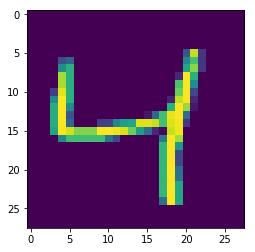

In [3]:
image = np.asarray(data[2]).squeeze()
plt.imshow(image)

## PCA

In [4]:
import numpy as np
from sklearn.decomposition import PCA

reshape = 784
new_data = data.reshape(num_images, reshape)

pca = PCA(0.95)
pca.fit(new_data)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [60]:
print(pca.n_components_)

154


### Reducing the Dimensionality

In [61]:
projected = pca.fit_transform(new_data)

In [62]:
new_data.shape, projected.shape

((60000, 784), (60000, 154))

### Rebuilding the Image

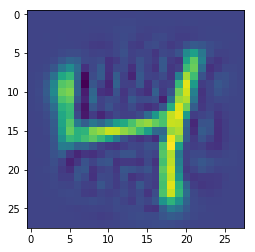

In [69]:
restored = pca.inverse_transform(projected)

restored = restored.reshape(num_images, image_size, image_size, 1)

restored_image = np.asarray(restored[2]).squeeze()

plt.imshow(restored_image)

### Comparing the Original Image to Approximated One

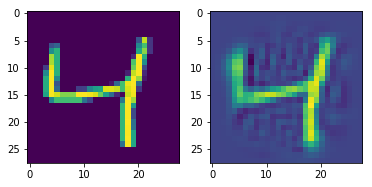

In [70]:
fig, ax = plt.subplots(1, 2)

ax[0].imshow(image)
ax[1].imshow(restored_image)


### Graph of Explained Ratio vs. Number of Components

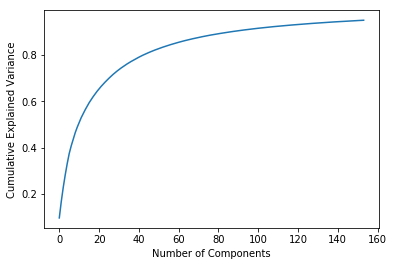

In [73]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components'); plt.ylabel('Cumulative Explained Variance');

## Logistic Regression

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape, x_test.shape, y_train.shape, y_test.shape

11493376/11490434 [==============================] - 5s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
from sklearn.linear_model import LogisticRegression

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
logReg = LogisticRegression()

logReg.fit(x_train, y_train)
logReg.predict(x_test)

## Statement of Collaboration

#### Whom I worked with:
For this assignment, I did most of it myself, but I did get some help from Matt and Kolby towards the beginning.
#### Resources Used:    
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html      
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60     

## Extra Credit

#### a. t-SNE
t-SNE stands for t-Distributed Stochastic Neighbor Embedding is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. It has 2 main stages, in the first stage, it constructs a probability distribution over pairs of high-dimensional objects in a way that similar objects have a high probability of being picked. In the second stage, defines a similar probability distribution over the points in the low-dimensional map. During the second phase it tries to minimize the Kullback-Leibler divergence, which is a measure of how one probability distribution is different from a second, between the two distributions with respect to the points on the map